In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import missingno as msno
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    from numpy import mean, std, hstack

    sns.set_theme(style="white")

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    from sklearn.utils import shuffle
    from sklearn.metrics import mean_absolute_error
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
    from sklearn.ensemble import BaggingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import VotingClassifier

In \[2\]:

    df = pd.read_csv(r"O:\ozlukortak\RAPORLAMA\Qlikview\bankloans.csv")

In \[3\]:

    df.head()

Out\[3\]:

|     | age | ed  | employ | address | income | debtinc | creddebt  | othdebt  | default |
|-----|-----|-----|--------|---------|--------|---------|-----------|----------|---------|
| 0   | 41  | 3   | 17     | 12      | 176    | 9.3     | 11.359392 | 5.008608 | 1.0     |
| 1   | 27  | 1   | 10     | 6       | 31     | 17.3    | 1.362202  | 4.000798 | 0.0     |
| 2   | 40  | 1   | 15     | 14      | 55     | 5.5     | 0.856075  | 2.168925 | 0.0     |
| 3   | 41  | 1   | 15     | 14      | 120    | 2.9     | 2.658720  | 0.821280 | 0.0     |
| 4   | 24  | 2   | 2      | 0       | 28     | 17.3    | 1.787436  | 3.056564 | 1.0     |

In \[4\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1150 entries, 0 to 1149
    Data columns (total 9 columns):
     #   Column    Non-Null Count  Dtype  
    ---  ------    --------------  -----  
     0   age       1150 non-null   int64  
     1   ed        1150 non-null   int64  
     2   employ    1150 non-null   int64  
     3   address   1150 non-null   int64  
     4   income    1150 non-null   int64  
     5   debtinc   1150 non-null   float64
     6   creddebt  1150 non-null   float64
     7   othdebt   1150 non-null   float64
     8   default   700 non-null    float64
    dtypes: float64(4), int64(5)
    memory usage: 81.0 KB

In \[5\]:

    df.shape

Out\[5\]:

    (1150, 9)

In \[6\]:

    df.describe().T

Out\[6\]:

|          | count  | mean      | std       | min       | 25%       | 50%       | 75%      | max       |
|----------|--------|-----------|-----------|-----------|-----------|-----------|----------|-----------|
| age      | 1150.0 | 35.235652 | 8.089961  | 20.000000 | 29.000000 | 35.000000 | 41.00000 | 56.00000  |
| ed       | 1150.0 | 1.695652  | 0.927051  | 1.000000  | 1.000000  | 1.000000  | 2.00000  | 5.00000   |
| employ   | 1150.0 | 8.781739  | 6.914762  | 0.000000  | 3.000000  | 7.000000  | 13.00000 | 33.00000  |
| address  | 1150.0 | 8.485217  | 6.977725  | 0.000000  | 3.000000  | 7.000000  | 12.00000 | 34.00000  |
| income   | 1150.0 | 47.982609 | 40.508814 | 13.000000 | 24.000000 | 36.000000 | 56.75000 | 446.00000 |
| debtinc  | 1150.0 | 10.063391 | 6.584288  | 0.100000  | 5.200000  | 8.750000  | 13.60000 | 41.30000  |
| creddebt | 1150.0 | 1.605111  | 2.135967  | 0.011696  | 0.415584  | 0.899130  | 1.89882  | 20.56131  |
| othdebt  | 1150.0 | 3.103844  | 3.529273  | 0.045584  | 1.047996  | 2.038053  | 3.86496  | 35.19750  |
| default  | 700.0  | 0.261429  | 0.439727  | 0.000000  | 0.000000  | 0.000000  | 1.00000  | 1.00000   |

In \[7\]:

    print(df.columns)

    Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
           'othdebt', 'default'],
          dtype='object')

In \[8\]:

    msno.matrix(df)
    plt.show()

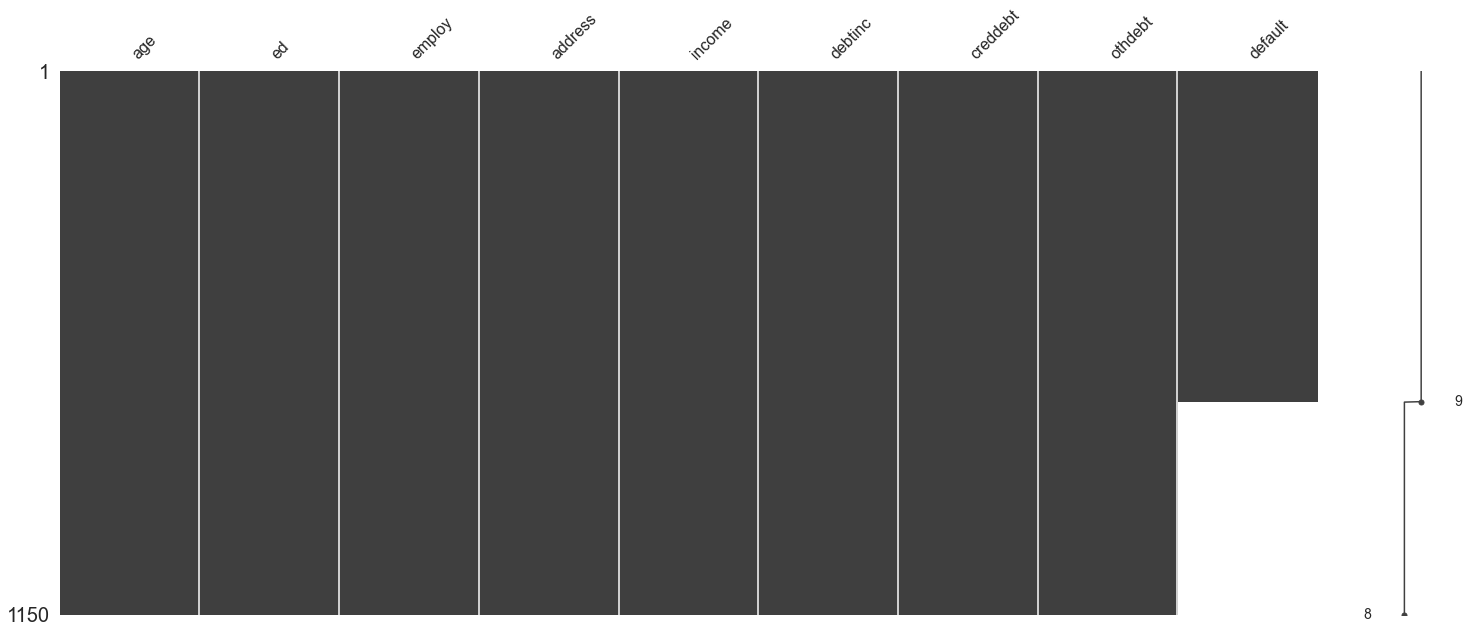

In \[9\]:

    msno.bar(df)
    plt.show()

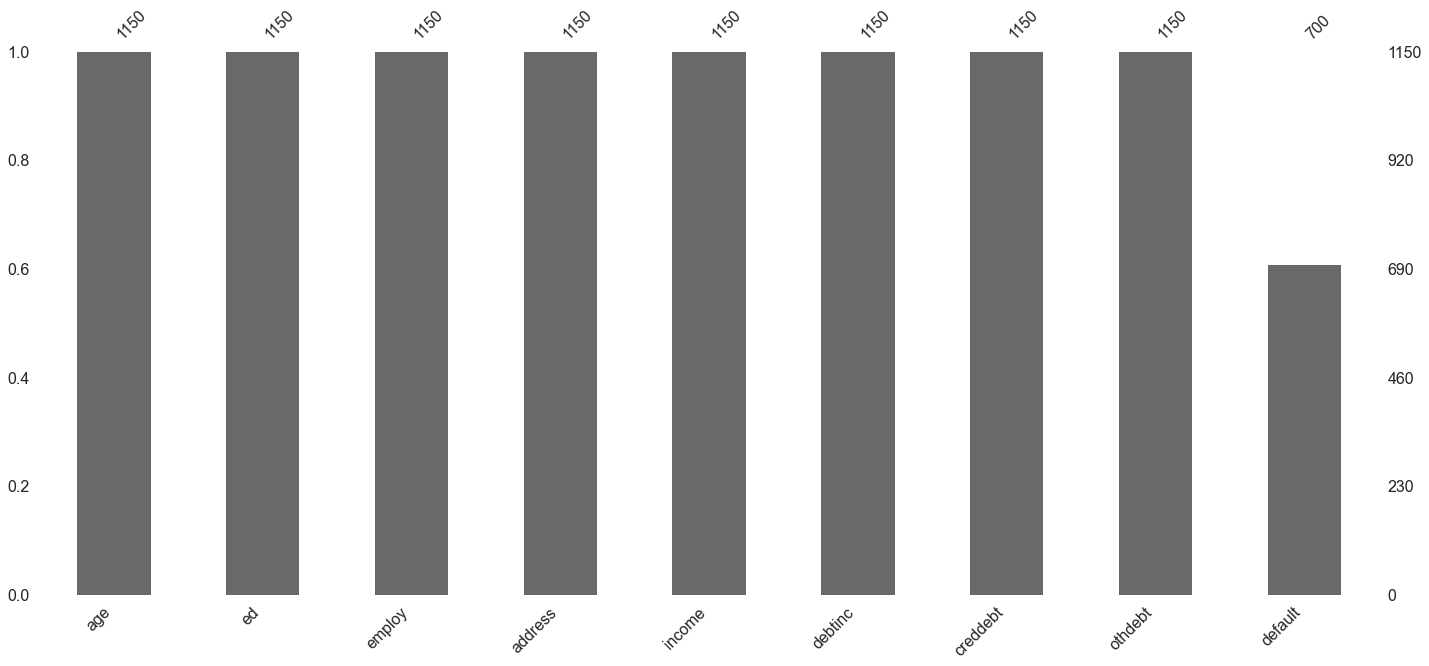

In \[10\]:

    df['age'].value_counts().sort_index(ascending = True)

Out\[10\]:

    20     2
    21    16
    22    18
    23    27
    24    42
    25    35
    26    44
    27    43
    28    40
    29    65
    30    42
    31    54
    32    40
    33    43
    34    48
    35    66
    36    41
    37    49
    38    44
    39    49
    40    42
    41    40
    42    16
    43    32
    44    27
    45    31
    46    28
    47    34
    48    27
    49     7
    50    17
    51     9
    52    13
    53     9
    54     4
    55     2
    56     4
    Name: age, dtype: int64

In \[11\]:

    def create_pie_plot(df, default):
        # Get value counts for the specified column
        counts = df[default].value_counts()

In \[12\]:

    import matplotlib.pyplot as plt

    def create_pie_plot(df, default):
        # Get value counts for the specified column
        counts = df[default].value_counts()
        
        # Create a pie plot
        plt.figure(figsize=(10, 8))
        plt.pie(counts, labels=counts.index, autopct='%1.3f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Distribution of {default}')
        plt.show()
        
    create_pie_plot(df, 'default')

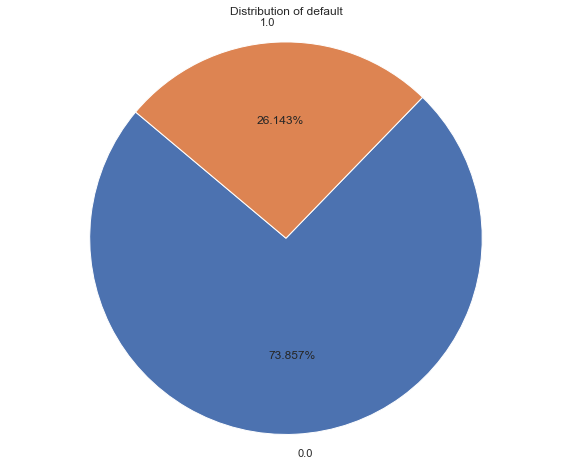

In \[13\]:

    # Yaşlara göre sayıları içeren Series
    age_counts = df['age'].value_counts().sort_index(ascending=True)

    # Çubuk grafik oluşturma
    plt.figure(figsize=(12, 9))
    age_counts.plot(kind='bar')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

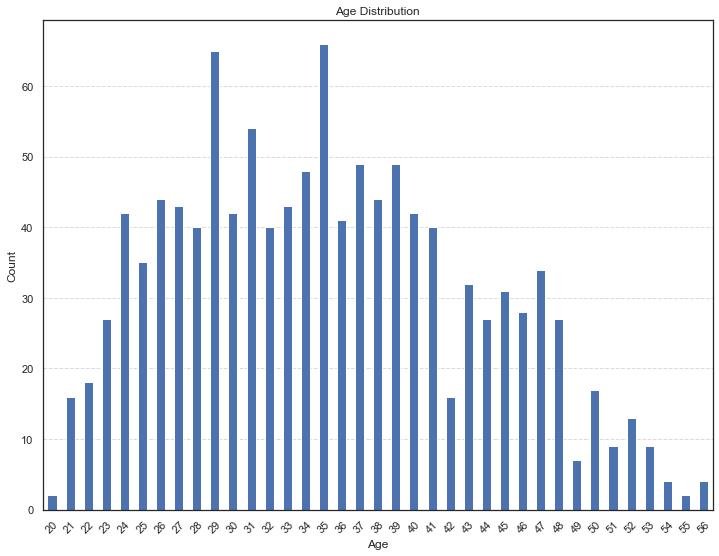

In \[14\]:

    df.hist(figsize= (14,16));
    plt.savefig('vars_dist.png')

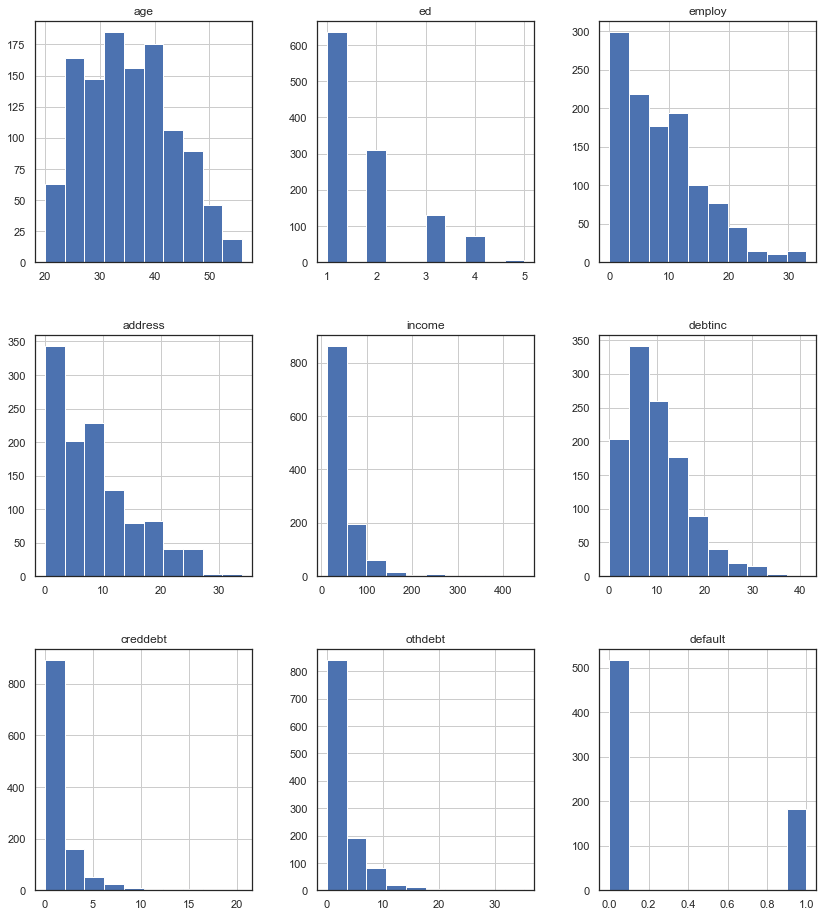

In \[15\]:

    df['default']

Out\[15\]:

    0       1.0
    1       0.0
    2       0.0
    3       0.0
    4       1.0
           ... 
    1145    NaN
    1146    NaN
    1147    NaN
    1148    NaN
    1149    NaN
    Name: default, Length: 1150, dtype: float64

In \[16\]:

    df = df.dropna()

In \[17\]:

    df_target = df[["default"]].values
    df_features = df.drop(columns = ["default"],axis=1).values
    def data_split(df, test_size):
        train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
        return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In \[18\]:

    # Import packages
    from keras.models import Model
    from keras.layers import Input, Dense
    import keras.backend as K
    import keras

In \[19\]:

    # Assuming you have example feature and target data
    X = df.drop(columns=['default'])  # Assuming 'target_column' is the name of your target column
    y = df['default']

In \[20\]:

    # Example: Loading data using sklearn's train_test_split
    from sklearn.model_selection import train_test_split

    # Assuming you have your data loaded into X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Now, you can use X_train to get the input shape
    input_shape = X_train.shape[1]

In \[21\]:

    # Model Creation
    X_input1 = Input((input_shape))

    X1 = Dense(16, activation='relu', name='l1')(X_input1)

    X1 = Dense(32, activation='relu', name='l2')(X1)

    # X1 = Dense(32, activation='relu', name='l3')(X1)

    # X1 = Dense(8, activation='relu', name='l4')(X1)

    X1 = Dense(1, activation='hard_sigmoid', name='l5')(X1)

    model = Model(X_input1, X1, name='MODEL_1')

In \[22\]:

    # Summary
    model.summary()

    Model: "MODEL_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_1 (InputLayer)         [(None, 8)]               0         
    _________________________________________________________________
    l1 (Dense)                   (None, 16)                144       
    _________________________________________________________________
    l2 (Dense)                   (None, 32)                544       
    _________________________________________________________________
    l5 (Dense)                   (None, 1)                 33        
    =================================================================
    Total params: 721
    Trainable params: 721
    Non-trainable params: 0
    _________________________________________________________________

In \[23\]:

    # Compiling the Model:
    # sgd = keras.optimizers.SGD(lr=0.05, momentum=0.01, nesterov=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In \[24\]:

    model = Sequential([
        Dense(32, input_shape=(8,), activation='relu'),  # Assuming 8 features
        Dense(64, activation='relu'),  # Add a hidden layer
        Dense(1, activation='sigmoid')  # Add an output layer
    ])

In \[25\]:

    methods = ['LR', 'DT', 'RF', 'SVM', 'Adaboos', 'GB']
    d_acc_num = [83, 78, 87, 79, 76, 78]
    sns.set_theme(style="darkgrid")
    plt.plot(methods, d_acc_num, 'bs--', linewidth=1.5, markersize=8,label='1')
    plt.ylim([50, 100])
    plt.yticks([50,60,70,80,90,100],
               labels=['50%', '60%','70%','80%','90%','100%'])
    plt.xlabel('MLs')
    plt.ylabel('Accuracy')
    plt.title('Precisions des modeles ')
    # plt.legend(['Dataset 2','Dataset 2'])
    plt.savefig('predictions.png')
    plt.show()

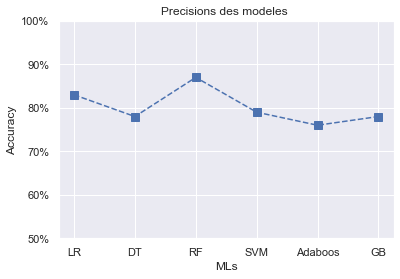

In \[ \]: